In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [24]:
df = pd.read_csv("used_cars.csv")

In [25]:
df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,7049052853,https://kpr.craigslist.org/ctd/d/pasco-diesels...,kennewick-pasco-richland,https://kpr.craigslist.org,49999,2016.0,ram,cummin 2500 laramie,NaN,...,4wd,NaN,truck,grey,https://images.craigslist.org/00h0h_d5xQ6Q7Ygd...,Call or Text 509-412-3404 2016 Dodge Ram 2500...,NaN,wa,46.2348,-119.128
19997,19997,7049052797,https://kpr.craigslist.org/ctd/d/yakima-2018-n...,kennewick-pasco-richland,https://kpr.craigslist.org,12127,2018.0,nissan,sentra,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00Y0Y_cuQ8XIP5R4...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496
19998,19998,7049049369,https://kpr.craigslist.org/ctd/d/walla-walla-2...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2019.0,jeep,grand cherokee limited,NaN,...,4wd,NaN,SUV,NaN,https://images.craigslist.org/00h0h_gvXVsydGQd...,Chrysler Dodge Jeep Ram of Walla WallaÂ Â Â Â ...,NaN,wa,46.0783,-118.293
19999,19999,7049042761,https://kpr.craigslist.org/ctd/d/yakima-2017-t...,kennewick-pasco-richland,https://kpr.craigslist.org,14661,2017.0,toyota,corolla,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00P0P_94PZlFJECu...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496


In [30]:
korelasi = df.corr()
korelasi

,Unnamed: 0,id,price,year,odometer,county,lat,long
Unnamed: 0,1.000000,-0.006098,0.006610,0.036414,-0.061438,NaN,0.297960,-0.565121
id,-0.006098,1.000000,-0.015290,-0.042850,0.043957,NaN,-0.049489,0.085952
price,0.006610,-0.015290,1.000000,-0.004382,-0.001608,NaN,-0.004885,0.001940
year,0.036414,-0.042850,-0.004382,1.000000,-0.401415,NaN,0.134063,-0.111264
odometer,-0.061438,0.043957,-0.001608,-0.401415,1.000000,NaN,-0.135611,0.148283
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,0.297960,-0.049489,-0.004885,0.134063,-0.135611,NaN,1.000000,-0.674701
long,-0.565121,0.085952,0.001940,-0.111264,0.148283,NaN,-0.674701,1.000000


In [31]:
cor = korelasi['odometer']
cor.drop(['odometer'])

Unnamed: 0   -0.061438
id            0.043957
price        -0.001608
year         -0.401415
county             NaN
lat          -0.135611
long          0.148283
Name: odometer, dtype: float64

In [32]:
sorted(cor.drop(['odometer']), reverse=True)

[0.0439569382988871,
 nan,
 0.14828314260511677,
 -0.0016075696319364354,
 -0.06143846490038697,
 -0.13561098472450975,
 -0.40141472415841933]

1. Long
2. Price
3. Lat
4. Year

In [33]:
data = (df[["long" , "price", "lat", "year", "odometer"]])
data.head()

,long,price,lat,year,odometer
0,-111.858,17899,40.7372,2012.0,63500.0
1,-111.884,0,40.5881,2016.0,10.0
2,-111.884,46463,40.5881,2015.0,7554.0
3,-111.884,0,40.5881,2016.0,10.0
4,-104.694,49999,40.3744,2018.0,70150.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   long      18970 non-null  float64
 1   price     20001 non-null  int64  
 2   lat       18970 non-null  float64
 3   year      19989 non-null  float64
 4   odometer  17612 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 781.4 KB


In [35]:
data = data.fillna({'long':data['long'].median()})
data.head(11)

,long,price,lat,year,odometer
0,-111.858,17899,40.7372,2012.0,63500.0
1,-111.884,0,40.5881,2016.0,10.0
2,-111.884,46463,40.5881,2015.0,7554.0
3,-111.884,0,40.5881,2016.0,10.0
4,-104.694,49999,40.3744,2018.0,70150.0
5,-104.694,13999,40.3744,2009.0,120057.0
6,-104.694,34500,40.3744,2017.0,95484.0
7,-104.694,14500,40.3744,2007.0,89340.0
8,-104.694,12500,40.3744,2013.0,226031.0
9,-104.694,34500,40.3744,2012.0,128153.0


In [36]:
data = data.fillna({'lat':data['lat'].median()})
data.head(11)

,long,price,lat,year,odometer
0,-111.858,17899,40.7372,2012.0,63500.0
1,-111.884,0,40.5881,2016.0,10.0
2,-111.884,46463,40.5881,2015.0,7554.0
3,-111.884,0,40.5881,2016.0,10.0
4,-104.694,49999,40.3744,2018.0,70150.0
5,-104.694,13999,40.3744,2009.0,120057.0
6,-104.694,34500,40.3744,2017.0,95484.0
7,-104.694,14500,40.3744,2007.0,89340.0
8,-104.694,12500,40.3744,2013.0,226031.0
9,-104.694,34500,40.3744,2012.0,128153.0


In [37]:
data = data.fillna({'year':data['year'].median()})
data.head(11)

,long,price,lat,year,odometer
0,-111.858,17899,40.7372,2012.0,63500.0
1,-111.884,0,40.5881,2016.0,10.0
2,-111.884,46463,40.5881,2015.0,7554.0
3,-111.884,0,40.5881,2016.0,10.0
4,-104.694,49999,40.3744,2018.0,70150.0
5,-104.694,13999,40.3744,2009.0,120057.0
6,-104.694,34500,40.3744,2017.0,95484.0
7,-104.694,14500,40.3744,2007.0,89340.0
8,-104.694,12500,40.3744,2013.0,226031.0
9,-104.694,34500,40.3744,2012.0,128153.0


In [38]:
data = data.fillna({'odometer':data['odometer'].median()})
data.head(11)

,long,price,lat,year,odometer
0,-111.858,17899,40.7372,2012.0,63500.0
1,-111.884,0,40.5881,2016.0,10.0
2,-111.884,46463,40.5881,2015.0,7554.0
3,-111.884,0,40.5881,2016.0,10.0
4,-104.694,49999,40.3744,2018.0,70150.0
5,-104.694,13999,40.3744,2009.0,120057.0
6,-104.694,34500,40.3744,2017.0,95484.0
7,-104.694,14500,40.3744,2007.0,89340.0
8,-104.694,12500,40.3744,2013.0,226031.0
9,-104.694,34500,40.3744,2012.0,128153.0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   long      20001 non-null  float64
 1   price     20001 non-null  int64  
 2   lat       20001 non-null  float64
 3   year      20001 non-null  float64
 4   odometer  20001 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 781.4 KB


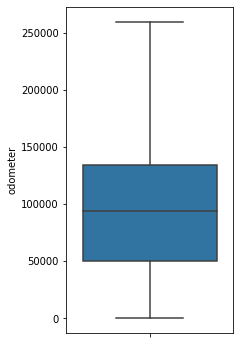

In [40]:
import seaborn as sns
plt.figure(figsize=(3,6))
sns.boxplot(y='odometer', data=df,showfliers=False);

In [42]:
def normalisasi(X_train_, X_test_):
  scaler = MinMaxScaler()
  X_train_minmax = scaler.fit_transform(X_train_)
  X_train_ = pd.DataFrame(X_train_minmax, columns=X_train_.columns)
  X_test_minmax = scaler.transform(X_test_)
  X_test_ = pd.DataFrame(X_test_minmax, columns=X_test_.columns)
  return X_train_,X_test_

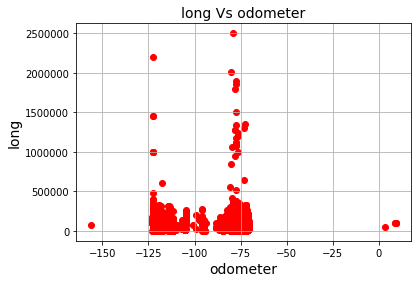

In [43]:
plt.scatter(data['long'], data['odometer'], color='red')
plt.title('long Vs odometer', fontsize=14)
plt.xlabel('odometer', fontsize=14)
plt.ylabel('long', fontsize=14)
plt.grid(True)
plt.show()

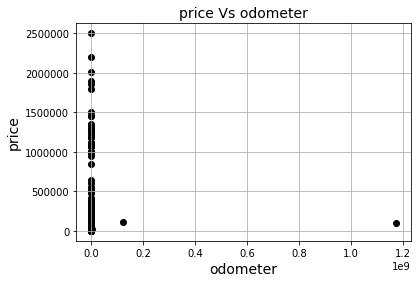

In [44]:
plt.scatter(data['price'], data['odometer'], color='black')
plt.title('price Vs odometer', fontsize=14)
plt.xlabel('odometer', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.grid(True)
plt.show()

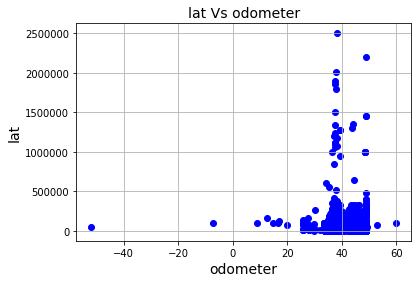

In [45]:
plt.scatter(data['lat'], data['odometer'], color='blue')
plt.title('lat Vs odometer', fontsize=14)
plt.xlabel('odometer', fontsize=14)
plt.ylabel('lat', fontsize=14)
plt.grid(True)
plt.show()

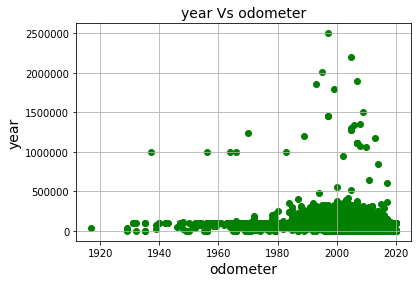

In [46]:
plt.scatter(data['year'], data['odometer'], color='green')
plt.title('year Vs odometer', fontsize=14)
plt.xlabel('odometer', fontsize=14)
plt.ylabel('year', fontsize=14)
plt.grid(True)
plt.show()

In [47]:
X = data[['long', 'price', 'lat', 'year']]
Y = data['odometer']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [49]:
X_train, X_test = normalisasi(X_train, X_test)

In [50]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
print(regressor.coef_)
print(regressor.intercept_)

[  69207.44424799  -21534.93964446  -16909.06617766 -256959.05188868]
312946.33522788645


In [51]:
y_pred = regressor.predict(X_test)

In [52]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
19135,93899.0,135065.529017
4981,126127.0,99045.098490
16644,127218.0,75775.657909
16709,50318.0,72950.324471
5306,25944.0,87923.799524
...,...,...
16554,148.0,110114.614981
6025,148369.0,87812.022032
10340,93899.0,156448.555541
800,83000.0,117705.762151


In [57]:
#df.plot(kind='bar',figsize=(10,8))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='yellow')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.show()

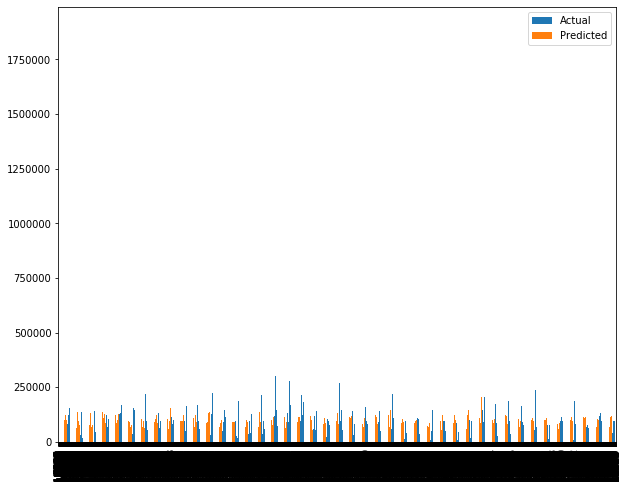

In [53]:
df.plot(kind='bar',figsize=(10,8))
plt.show()

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 38672.16553328581
